In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [2]:

beach_quality_df = pd.read_csv('Resources/Beach_Water_Quality.csv')
beach_quality_df.head()

,Beach Name,Measurement Timestamp,Water Temperature,Turbidity,Transducer Depth,Wave Height,Wave Period,Battery Life,Measurement Timestamp Label,Measurement ID
0,Ohio Street Beach,6/2/19 17:00,17.1,0.78,NaN,0.232,4.0,10.9,6/2/19 17:00,OhioStreetBeach201906021700
1,63rd Street Beach,9/18/13 10:00,18.9,7.56,1.517,0.140,4.0,11.0,9/18/13 10:00,63rdStreetBeach201309181000
2,63rd Street Beach,6/12/14 12:00,25.4,3.45,-0.072,0.031,9.0,12.2,6/12/14 12:00,63rdStreetBeach201406121200
3,63rd Street Beach,6/12/14 13:00,18.1,3.31,1.818,0.339,10.0,12.2,6/12/14 13:00,63rdStreetBeach201406121300
4,63rd Street Beach,6/12/14 14:00,17.5,2.93,1.545,0.136,4.0,12.2,6/12/14 14:00,63rdStreetBeach201406121400


In [3]:
beach_quality_df['Turbidity'].head()

0    0.78
1    7.56
2    3.45
3    3.31
4    2.93
Name: Turbidity, dtype: float64

In [4]:
beach_quality_df['Beach Name'].count()

39469

In [5]:
turbidity_means = beach_quality_df.groupby("Beach Name")["Turbidity"].mean()
turbidity_means

Beach Name
63rd Street Beach    4.313150
Calumet Beach        1.886594
Montrose Beach       2.898791
Ohio Street Beach    5.951276
Osterman Beach       8.707598
Rainbow Beach        3.164116
Name: Turbidity, dtype: float64

In [6]:
beach_quality_df.shape

(39469, 10)

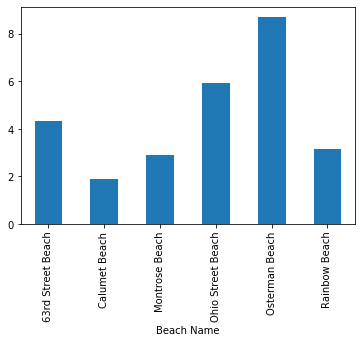

In [7]:
x = turbidity_means.plot.bar()

In [8]:
selected_beach_quality_df = beach_quality_df[['Beach Name','Measurement Timestamp','Water Temperature','Turbidity','Wave Height', 'Wave Period']].copy()
selected_beach_quality_df.head()

,Beach Name,Measurement Timestamp,Water Temperature,Turbidity,Wave Height,Wave Period
0,Ohio Street Beach,6/2/19 17:00,17.1,0.78,0.232,4.0
1,63rd Street Beach,9/18/13 10:00,18.9,7.56,0.140,4.0
2,63rd Street Beach,6/12/14 12:00,25.4,3.45,0.031,9.0
3,63rd Street Beach,6/12/14 13:00,18.1,3.31,0.339,10.0
4,63rd Street Beach,6/12/14 14:00,17.5,2.93,0.136,4.0


In [9]:
result_turbidity_df = selected_beach_quality_df[['Beach Name', 'Measurement Timestamp', "Turbidity"]].copy().sort_values("Beach Name")

In [10]:
result_turbidity_df

,Beach Name,Measurement Timestamp,Turbidity
2655,63rd Street Beach,8/5/15 14:00,0.52
2275,63rd Street Beach,7/17/15 2:00,3.07
2276,63rd Street Beach,7/17/15 4:00,3.61
2277,63rd Street Beach,7/17/15 5:00,3.76
2278,63rd Street Beach,7/17/15 6:00,3.95
...,...,...,...
33815,Rainbow Beach,8/8/15 10:00,0.57
33814,Rainbow Beach,8/8/15 9:00,0.60
33813,Rainbow Beach,8/8/15 8:00,0.60
33823,Rainbow Beach,8/8/15 18:00,3.68


In [11]:
result_turbidity_df["Date"] = pd.to_datetime(result_turbidity_df["Measurement Timestamp"]).dt.date
result_turbidity_df['Date']= pd.to_datetime(result_turbidity_df['Date']) 

result_turbidity_df.info()
result_turbidity_df

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39469 entries, 2655 to 39468
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Beach Name             39469 non-null  object        
 1   Measurement Timestamp  39469 non-null  object        
 2   Turbidity              39469 non-null  float64       
 3   Date                   39469 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 1.5+ MB


,Beach Name,Measurement Timestamp,Turbidity,Date
2655,63rd Street Beach,8/5/15 14:00,0.52,2015-08-05
2275,63rd Street Beach,7/17/15 2:00,3.07,2015-07-17
2276,63rd Street Beach,7/17/15 4:00,3.61,2015-07-17
2277,63rd Street Beach,7/17/15 5:00,3.76,2015-07-17
2278,63rd Street Beach,7/17/15 6:00,3.95,2015-07-17
...,...,...,...,...
33815,Rainbow Beach,8/8/15 10:00,0.57,2015-08-08
33814,Rainbow Beach,8/8/15 9:00,0.60,2015-08-08
33813,Rainbow Beach,8/8/15 8:00,0.60,2015-08-08
33823,Rainbow Beach,8/8/15 18:00,3.68,2015-08-08


In [12]:
result_turbidity_2014_df = result_turbidity_df[(result_turbidity_df['Date'] > '12/31/2013') & (result_turbidity_df['Date'] < '01/01/2015')]
result_turbidity_2015_df = result_turbidity_df[(result_turbidity_df['Date'] > '12/31/2014') & (result_turbidity_df['Date'] < '01/01/2016')]
result_turbidity_2016_df = result_turbidity_df[(result_turbidity_df['Date'] > '12/31/2015') & (result_turbidity_df['Date'] < '01/01/2017')]
result_turbidity_2017_df = result_turbidity_df[(result_turbidity_df['Date'] > '12/31/2016') & (result_turbidity_df['Date'] < '01/01/2018')]
result_turbidity_2018_df = result_turbidity_df[(result_turbidity_df['Date'] > '12/31/2017') & (result_turbidity_df['Date'] < '01/01/2019')]
result_turbidity_2019_df = result_turbidity_df[(result_turbidity_df['Date'] > '12/31/2018') & (result_turbidity_df['Date'] < '01/01/2020')]

In [13]:
result_turbidity_2014_df

,Beach Name,Measurement Timestamp,Turbidity,Date
563,63rd Street Beach,7/6/14 10:00,0.47,2014-07-06
564,63rd Street Beach,7/6/14 11:00,0.45,2014-07-06
565,63rd Street Beach,7/6/14 12:00,0.66,2014-07-06
566,63rd Street Beach,7/6/14 13:00,0.87,2014-07-06
567,63rd Street Beach,7/6/14 14:00,0.62,2014-07-06
...,...,...,...,...
32167,Rainbow Beach,7/7/14 8:00,0.88,2014-07-07
32166,Rainbow Beach,7/7/14 7:00,0.90,2014-07-07
32165,Rainbow Beach,7/7/14 6:00,0.94,2014-07-07
32164,Rainbow Beach,7/7/14 5:00,0.72,2014-07-07


In [14]:
result_turbidity_2015_df

,Beach Name,Measurement Timestamp,Turbidity,Date
2655,63rd Street Beach,8/5/15 14:00,0.52,2015-08-05
2275,63rd Street Beach,7/17/15 2:00,3.07,2015-07-17
2276,63rd Street Beach,7/17/15 4:00,3.61,2015-07-17
2277,63rd Street Beach,7/17/15 5:00,3.76,2015-07-17
2278,63rd Street Beach,7/17/15 6:00,3.95,2015-07-17
...,...,...,...,...
33815,Rainbow Beach,8/8/15 10:00,0.57,2015-08-08
33814,Rainbow Beach,8/8/15 9:00,0.60,2015-08-08
33813,Rainbow Beach,8/8/15 8:00,0.60,2015-08-08
33823,Rainbow Beach,8/8/15 18:00,3.68,2015-08-08


In [15]:
mu_turbidity_2014_df = result_turbidity_2014_df.groupby("Beach Name")["Turbidity"].mean()
mu_turbidity_2015_df = result_turbidity_2015_df.groupby("Beach Name")["Turbidity"].mean()
mu_turbidity_2016_df = result_turbidity_2016_df.groupby("Beach Name")["Turbidity"].mean()
mu_turbidity_2017_df = result_turbidity_2017_df.groupby("Beach Name")["Turbidity"].mean()
mu_turbidity_2018_df = result_turbidity_2018_df.groupby("Beach Name")["Turbidity"].mean()
mu_turbidity_2019_df = result_turbidity_2019_df.groupby("Beach Name")["Turbidity"].mean()

In [16]:
mu_turbidity_2014_df

Beach Name
63rd Street Beach     7.628707
Calumet Beach         1.529727
Montrose Beach        4.332926
Ohio Street Beach    27.272717
Osterman Beach        4.127782
Rainbow Beach         1.097441
Name: Turbidity, dtype: float64

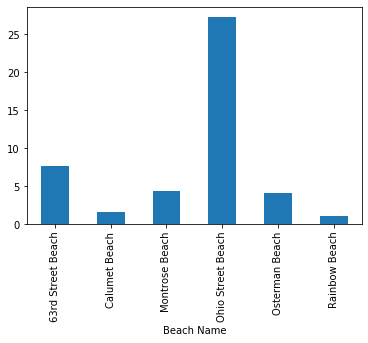

In [17]:
x = mu_turbidity_2014_df.plot.bar()

In [18]:
mu_turbidity_2015_df

Beach Name
63rd Street Beach     2.608415
Calumet Beach         2.087182
Montrose Beach        3.929488
Ohio Street Beach     1.977578
Osterman Beach       12.451613
Rainbow Beach         3.980990
Name: Turbidity, dtype: float64

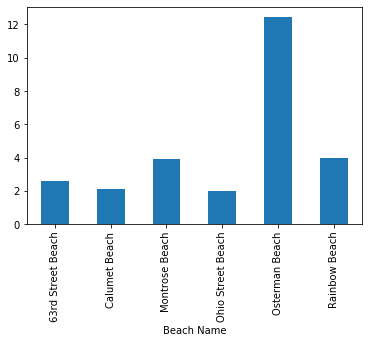

In [19]:
x = mu_turbidity_2015_df.plot.bar()

In [20]:
mu_turbidity_2016_df

Beach Name
Calumet Beach        1.950306
Montrose Beach       0.606981
Ohio Street Beach    2.859882
Name: Turbidity, dtype: float64

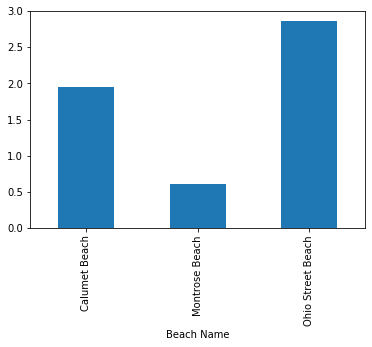

In [21]:
x = mu_turbidity_2016_df.plot.bar()

In [22]:
mu_turbidity_2017_df

Beach Name
Ohio Street Beach    2.508552
Name: Turbidity, dtype: float64

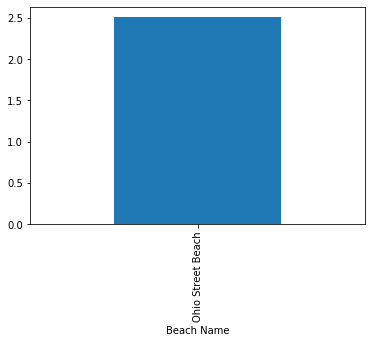

In [23]:
x = mu_turbidity_2017_df.plot.bar()

In [24]:
mu_turbidity_2018_df

Beach Name
Calumet Beach        3.150000
Ohio Street Beach    1.798583
Name: Turbidity, dtype: float64

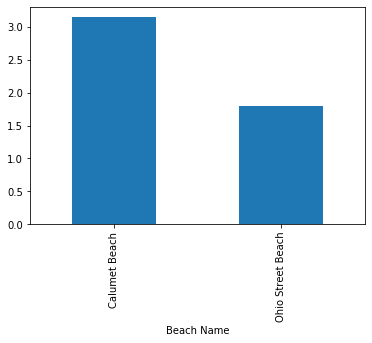

In [25]:
x = mu_turbidity_2018_df.plot.bar()

In [26]:
mu_turbidity_2019_df

Beach Name
Ohio Street Beach    2.42035
Name: Turbidity, dtype: float64

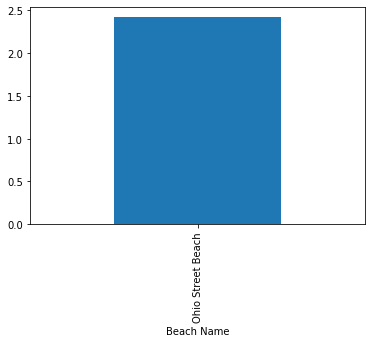

In [27]:
x = mu_turbidity_2019_df.plot.bar()

In [28]:
waves = beach_quality_df.groupby("Beach Name")["Wave Height"].mean()
waves 

Beach Name
63rd Street Beach    -1347.386252
Calumet Beach            0.152585
Montrose Beach           0.202249
Ohio Street Beach     -287.751254
Osterman Beach           0.184694
Rainbow Beach       -13379.676708
Name: Wave Height, dtype: float64

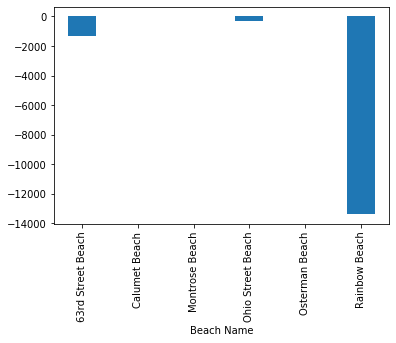

In [29]:
xwaves = waves.plot.bar()

In [30]:
beach_quality_df.dropna(subset= ['Wave Height']).shape

(39240, 10)

In [31]:
waves.replace('', np.NaN)

Beach Name
63rd Street Beach    -1347.386252
Calumet Beach            0.152585
Montrose Beach           0.202249
Ohio Street Beach     -287.751254
Osterman Beach           0.184694
Rainbow Beach       -13379.676708
Name: Wave Height, dtype: float64

In [32]:
beach_quality_df.columns = [c.replace(' ', '_') for c in beach_quality_df.columns]

In [33]:
beach_quality_df.columns

Index(['Beach_Name', 'Measurement_Timestamp', 'Water_Temperature', 'Turbidity',
       'Transducer_Depth', 'Wave_Height', 'Wave_Period', 'Battery_Life',
       'Measurement_Timestamp_Label', 'Measurement_ID'],
      dtype='object')

In [34]:
beach_quality_df[beach_quality_df.Wave_Height<0]

,Beach_Name,Measurement_Timestamp,Water_Temperature,Turbidity,Transducer_Depth,Wave_Height,Wave_Period,Battery_Life,Measurement_Timestamp_Label,Measurement_ID
3375,63rd Street Beach,9/11/15 19:00,20.0,5.83,NaN,-99999.992,-100000.0,10.6,9/11/15 19:00,63rdStreetBeach201509111900
3376,63rd Street Beach,9/11/15 21:00,19.5,8.81,NaN,-99999.992,-100000.0,5.6,9/11/15 21:00,63rdStreetBeach201509112100
3377,63rd Street Beach,9/11/15 22:00,19.2,14.59,NaN,-99999.992,-100000.0,5.3,9/11/15 22:00,63rdStreetBeach201509112200
3378,63rd Street Beach,9/11/15 23:00,19.1,9.56,NaN,-99999.992,-100000.0,5.5,9/11/15 23:00,63rdStreetBeach201509112300
3380,63rd Street Beach,9/12/15 1:00,19.2,14.10,NaN,-99999.992,-100000.0,5.4,9/12/15 1:00,63rdStreetBeach201509120100
...,...,...,...,...,...,...,...,...,...,...
34914,Rainbow Beach,10/1/15 2:00,16.2,55.64,NaN,-99999.992,-100000.0,9.5,10/1/15 2:00,RainbowBeach201510010200
34915,Rainbow Beach,10/1/15 3:00,16.2,21.96,NaN,-99999.992,-100000.0,5.3,10/1/15 3:00,RainbowBeach201510010300
34916,Rainbow Beach,10/1/15 4:00,15.8,0.15,NaN,-99999.992,-100000.0,10.4,10/1/15 4:00,RainbowBeach201510010400
34917,Rainbow Beach,10/1/15 5:00,15.9,8.59,NaN,-99999.992,-100000.0,5.7,10/1/15 5:00,RainbowBeach201510010500


In [35]:
negatives = beach_quality_df[beach_quality_df['Wave_Height'] < 0]
negatives

,Beach_Name,Measurement_Timestamp,Water_Temperature,Turbidity,Transducer_Depth,Wave_Height,Wave_Period,Battery_Life,Measurement_Timestamp_Label,Measurement_ID
3375,63rd Street Beach,9/11/15 19:00,20.0,5.83,NaN,-99999.992,-100000.0,10.6,9/11/15 19:00,63rdStreetBeach201509111900
3376,63rd Street Beach,9/11/15 21:00,19.5,8.81,NaN,-99999.992,-100000.0,5.6,9/11/15 21:00,63rdStreetBeach201509112100
3377,63rd Street Beach,9/11/15 22:00,19.2,14.59,NaN,-99999.992,-100000.0,5.3,9/11/15 22:00,63rdStreetBeach201509112200
3378,63rd Street Beach,9/11/15 23:00,19.1,9.56,NaN,-99999.992,-100000.0,5.5,9/11/15 23:00,63rdStreetBeach201509112300
3380,63rd Street Beach,9/12/15 1:00,19.2,14.10,NaN,-99999.992,-100000.0,5.4,9/12/15 1:00,63rdStreetBeach201509120100
...,...,...,...,...,...,...,...,...,...,...
34914,Rainbow Beach,10/1/15 2:00,16.2,55.64,NaN,-99999.992,-100000.0,9.5,10/1/15 2:00,RainbowBeach201510010200
34915,Rainbow Beach,10/1/15 3:00,16.2,21.96,NaN,-99999.992,-100000.0,5.3,10/1/15 3:00,RainbowBeach201510010300
34916,Rainbow Beach,10/1/15 4:00,15.8,0.15,NaN,-99999.992,-100000.0,10.4,10/1/15 4:00,RainbowBeach201510010400
34917,Rainbow Beach,10/1/15 5:00,15.9,8.59,NaN,-99999.992,-100000.0,5.7,10/1/15 5:00,RainbowBeach201510010500


In [36]:
newdf=beach_quality_df[beach_quality_df.Wave_Height > 0]
newdf

,Beach_Name,Measurement_Timestamp,Water_Temperature,Turbidity,Transducer_Depth,Wave_Height,Wave_Period,Battery_Life,Measurement_Timestamp_Label,Measurement_ID
0,Ohio Street Beach,6/2/19 17:00,17.1,0.78,NaN,0.232,4.0,10.9,6/2/19 17:00,OhioStreetBeach201906021700
1,63rd Street Beach,9/18/13 10:00,18.9,7.56,1.517,0.140,4.0,11.0,9/18/13 10:00,63rdStreetBeach201309181000
2,63rd Street Beach,6/12/14 12:00,25.4,3.45,-0.072,0.031,9.0,12.2,6/12/14 12:00,63rdStreetBeach201406121200
3,63rd Street Beach,6/12/14 13:00,18.1,3.31,1.818,0.339,10.0,12.2,6/12/14 13:00,63rdStreetBeach201406121300
4,63rd Street Beach,6/12/14 14:00,17.5,2.93,1.545,0.136,4.0,12.2,6/12/14 14:00,63rdStreetBeach201406121400
...,...,...,...,...,...,...,...,...,...,...
39462,Ohio Street Beach,9/7/19 15:00,19.2,20.78,NaN,0.192,4.0,10.5,9/7/19 15:00,OhioStreetBeach201909071500
39464,Calumet Beach,9/20/16 13:00,21.7,3.15,NaN,0.389,3.0,9.4,9/20/16 13:00,CalumetBeach201609201300
39465,Montrose Beach,9/14/16 19:00,21.9,0.01,NaN,0.360,3.0,9.4,9/14/16 19:00,MontroseBeach201609141900
39466,Ohio Street Beach,9/11/19 11:00,23.8,0.00,NaN,0.028,10.0,10.2,9/11/19 11:00,OhioStreetBeach201909111100


In [37]:
Wave_Height = newdf.groupby("Beach_Name")["Wave_Height"].mean()
Wave_Height

Beach_Name
63rd Street Beach    0.155694
Calumet Beach        0.152585
Montrose Beach       0.202249
Ohio Street Beach    0.163972
Osterman Beach       0.184694
Rainbow Beach        0.203868
Name: Wave_Height, dtype: float64

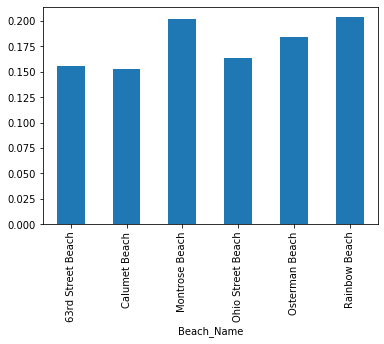

In [38]:
xwaves = Wave_Height.plot.bar()

In [39]:
result_wave_df = newdf.copy()

In [40]:
result_wave_df["Date"] = pd.to_datetime(result_wave_df["Measurement_Timestamp"]).dt.date
result_wave_df['Date']= pd.to_datetime(result_wave_df['Date']) 


In [41]:
result_wave_df.info()
result_wave_df

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38716 entries, 0 to 39467
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Beach_Name                   38716 non-null  object        
 1   Measurement_Timestamp        38716 non-null  object        
 2   Water_Temperature            38716 non-null  float64       
 3   Turbidity                    38716 non-null  float64       
 4   Transducer_Depth             10034 non-null  float64       
 5   Wave_Height                  38716 non-null  float64       
 6   Wave_Period                  38716 non-null  float64       
 7   Battery_Life                 38716 non-null  float64       
 8   Measurement_Timestamp_Label  38716 non-null  object        
 9   Measurement_ID               38716 non-null  object        
 10  Date                         38716 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(6), object(

,Beach_Name,Measurement_Timestamp,Water_Temperature,Turbidity,Transducer_Depth,Wave_Height,Wave_Period,Battery_Life,Measurement_Timestamp_Label,Measurement_ID,Date
0,Ohio Street Beach,6/2/19 17:00,17.1,0.78,NaN,0.232,4.0,10.9,6/2/19 17:00,OhioStreetBeach201906021700,2019-06-02
1,63rd Street Beach,9/18/13 10:00,18.9,7.56,1.517,0.140,4.0,11.0,9/18/13 10:00,63rdStreetBeach201309181000,2013-09-18
2,63rd Street Beach,6/12/14 12:00,25.4,3.45,-0.072,0.031,9.0,12.2,6/12/14 12:00,63rdStreetBeach201406121200,2014-06-12
3,63rd Street Beach,6/12/14 13:00,18.1,3.31,1.818,0.339,10.0,12.2,6/12/14 13:00,63rdStreetBeach201406121300,2014-06-12
4,63rd Street Beach,6/12/14 14:00,17.5,2.93,1.545,0.136,4.0,12.2,6/12/14 14:00,63rdStreetBeach201406121400,2014-06-12
...,...,...,...,...,...,...,...,...,...,...,...
39462,Ohio Street Beach,9/7/19 15:00,19.2,20.78,NaN,0.192,4.0,10.5,9/7/19 15:00,OhioStreetBeach201909071500,2019-09-07
39464,Calumet Beach,9/20/16 13:00,21.7,3.15,NaN,0.389,3.0,9.4,9/20/16 13:00,CalumetBeach201609201300,2016-09-20
39465,Montrose Beach,9/14/16 19:00,21.9,0.01,NaN,0.360,3.0,9.4,9/14/16 19:00,MontroseBeach201609141900,2016-09-14
39466,Ohio Street Beach,9/11/19 11:00,23.8,0.00,NaN,0.028,10.0,10.2,9/11/19 11:00,OhioStreetBeach201909111100,2019-09-11


In [42]:
result_wave_2014_df = result_wave_df[(result_wave_df['Date'] > '12/31/2013') & (result_wave_df['Date'] < '01/01/2015')]
result_wave_2015_df = result_wave_df[(result_wave_df['Date'] > '12/31/2014') & (result_wave_df['Date'] < '01/01/2016')]
result_wave_2016_df = result_wave_df[(result_wave_df['Date'] > '12/31/2015') & (result_wave_df['Date'] < '01/01/2017')]
result_wave_2017_df = result_wave_df[(result_wave_df['Date'] > '12/31/2016') & (result_wave_df['Date'] < '01/01/2018')]
result_wave_2018_df = result_wave_df[(result_wave_df['Date'] > '12/31/2017') & (result_wave_df['Date'] < '01/01/2019')]
result_wave_2019_df = result_wave_df[(result_wave_df['Date'] > '12/31/2018') & (result_wave_df['Date'] < '01/01/2020')]

In [43]:
mu_wave_2014_df = result_wave_2014_df.groupby("Beach_Name")["Wave_Height"].mean()
mu_wave_2014_df

Beach_Name
63rd Street Beach    0.168338
Calumet Beach        0.124145
Montrose Beach       0.198716
Ohio Street Beach    0.153828
Osterman Beach       0.179666
Rainbow Beach        0.170514
Name: Wave_Height, dtype: float64

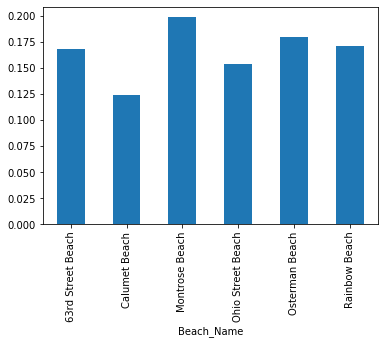

In [44]:
x = mu_wave_2014_df.plot.bar()

In [45]:
mu_wave_2015_df = result_wave_2015_df.groupby("Beach_Name")["Wave_Height"].mean()
mu_wave_2015_df

Beach_Name
63rd Street Beach    0.150373
Calumet Beach        0.139443
Montrose Beach       0.203980
Ohio Street Beach    0.138456
Osterman Beach       0.188782
Rainbow Beach        0.220085
Name: Wave_Height, dtype: float64

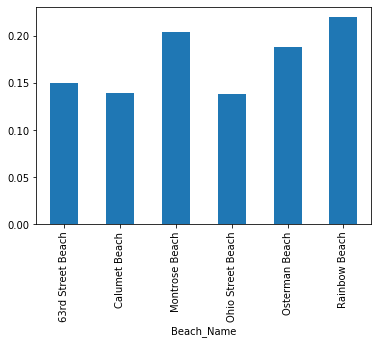

In [46]:
x = mu_wave_2015_df.plot.bar()

In [47]:
mu_wave_2016_df = result_wave_2016_df.groupby("Beach_Name")["Wave_Height"].mean()
mu_wave_2016_df

Beach_Name
Calumet Beach        0.193213
Montrose Beach       0.203686
Ohio Street Beach    0.152298
Name: Wave_Height, dtype: float64

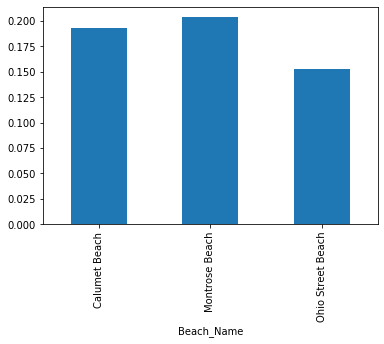

In [48]:
x = mu_wave_2016_df.plot.bar()

In [49]:
mu_wave_2017_df = result_wave_2017_df.groupby("Beach_Name")["Wave_Height"].mean()
mu_wave_2017_df

Beach_Name
Ohio Street Beach    0.187
Name: Wave_Height, dtype: float64

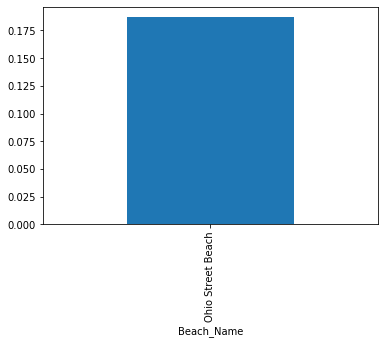

In [50]:
x = mu_wave_2017_df.plot.bar()

In [51]:
mu_wave_2018_df = result_wave_2018_df.groupby("Beach_Name")["Wave_Height"].mean()
mu_wave_2018_df

Beach_Name
Calumet Beach        0.389000
Ohio Street Beach    0.178346
Name: Wave_Height, dtype: float64

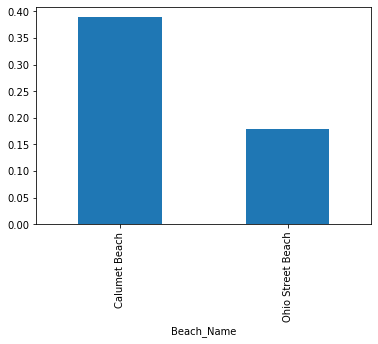

In [52]:
x = mu_wave_2018_df.plot.bar()

In [53]:
mu_wave_2019_df = result_wave_2019_df.groupby("Beach_Name")["Wave_Height"].mean()
mu_wave_2019_df

Beach_Name
Ohio Street Beach    0.168164
Name: Wave_Height, dtype: float64

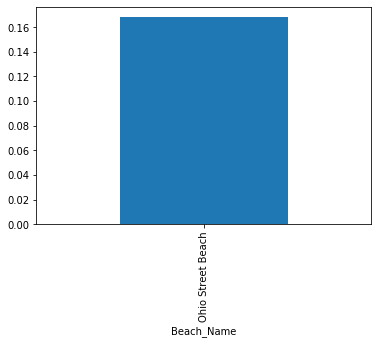

In [54]:
x = mu_wave_2019_df.plot.bar()

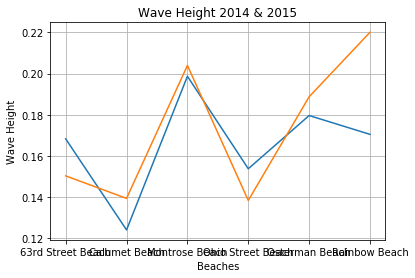

In [55]:
# Compare 2014/2015 Wave height
plt.title("Wave Height 2014 & 2015")
plt.xlabel("Beaches")
plt.ylabel("Wave Height")
plt.grid()

plt.plot(mu_wave_2014_df)
plt.plot(mu_wave_2015_df)
plt.savefig("wave_hgt_201415.png")
plt.show();

In [56]:
mu_turbidity_2014_df
print(len(mu_turbidity_2014_df))

6


In [57]:
mu_turbidity_2015_df
#mu_turbidity_2015_df.info()

Beach Name
63rd Street Beach     2.608415
Calumet Beach         2.087182
Montrose Beach        3.929488
Ohio Street Beach     1.977578
Osterman Beach       12.451613
Rainbow Beach         3.980990
Name: Turbidity, dtype: float64

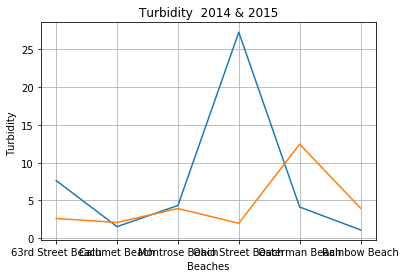

In [58]:
# Compare 2014/2015 Turbidity 
plt.title("Turbidity  2014 & 2015")
plt.xlabel("Beaches")
plt.ylabel("Turbidity ")
plt.grid()

plt.plot(mu_turbidity_2014_df)
plt.plot(mu_turbidity_2015_df)

plt.savefig("turbidity_h201415.png")
plt.show();